# Logistic Regression With Python
The dataset is taken from https://www.kaggle.com/uciml/pima-indians-diabetes-database. 

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* **Pregnancies** - Number of times pregnant
* **Glucose** - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure** - Diastolic blood pressure (mm Hg)
* **SkinThickness** - Triceps skin fold thickness (mm)
* **Insulin** - 2-Hour serum insulin (mu U/ml)
* **BMI** - Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction** - Diabetes pedigree function
* **Age** - Age (years)
* **Outcome** - Class variable (0 or 1) 268 of 768 are 1, the others are 0 (1 - Has diabetes, 0 - No diabetes)

In [1]:
import pandas as pd

# load dataset
pima = pd.read_csv("dataset/pima-indians-diabetes.csv")

# Get an overview of the dataset
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
# Check first 10 top records of the dataset
pima.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Selecting Feature

The variables are divided into two categories, dependent (or target) variables and independent (or featuer) variables.

In [3]:
independent_vars = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
dependent_var = pima.Outcome
# Features
X = pima[independent_vars] 
# Target variable
y = dependent_var

## Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function ```train_test_split()```. You need to pass 3 parameters ```independent variables```, ```dependent variable```, and ```test_set size```. Additionally, you can use ```random_state``` to select records randomly.

In [4]:
# split X and y into training and testing sets
# scikit-learn v0.21.3
from sklearn.model_selection import train_test_split

# X_train and X_test are from independent variables
# y_train and y_test are from dependent variable
# 75% data will be used for model training and 25% for model testing.
# Records are not selected randomly for each attempt (random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Model Development and Prediction

In [5]:
# import the Logistic Regression module
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier object using LogisticRegression() function.
logreg = LogisticRegression()

# Fit your model on the train set using fit() (Train the model)
logreg.fit(X_train, y_train)

# Perform prediction on the test set using predict(). (Test the model)
y_pred = logreg.predict(X_test)

/Users/nadisha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. 

The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [6]:
from sklearn import metrics

# The confuction matrix has been generated for test dataset 
cnf_metrix = metrics.confusion_matrix(y_test, y_pred)

cnf_metrix

array([[119,  11],
       [ 26,  36]])

Here, you can see the confusion matrix in the form of the array object.

## Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted Label')

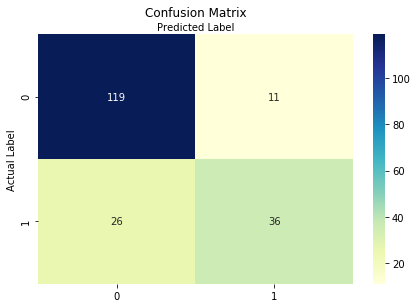

In [7]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Possible binary Outcomes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_metrix), annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

* The dimension of this matrix is 2*2 because this model is binary classification. 

* You have two classes 0 and 1. 

* Diagonal values represent accurate predictions. In the output, 119 and 36 are actual predictions 

* Non-diagonal elements are inaccurate predictions. In the output, 26 and 11 are incorrect predictions.

## Confusion Matrix Interpretation
Zero (0) means, the patient has no diabetes whereas One (1) means, the patient has diabetes.

* True Negative (TN) - There are 119 patients actually marked as no diabetes and the model also predicted that they do not have diabetes (**correct prediction**)
* False Positive (FP) - There are 11 patients actually marked as no diabetes but the model has predicated that they have diabetes (**wrong prediction**)
* False Negative (FN) - There are 26 patients actually marked as have diabetes but the model has predicated that they do not have diabetes (**wrong prediction**)
* True Positive (TP) - There are 36 patients actually marked as have diabetes and the model also predicted that they have diabetes (**correct prediction**)

The total number of testing records 192 (119 + 11 + 26 + 36)

## Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [8]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


### Accuracy
The classification is done with 80% accuracy which is good. In other words, the model is 80% accurate.

### Precision
Precision is when a model makes a prediction, how often it is correct. In other words, your Logistic Regression model predicts 76% of the time precisely, patients are going to suffer from diabetes.

### Recall
If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

## ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the **true positive rate** against the **false positive rate**. It shows the tradeoff between sensitivity and specificity.

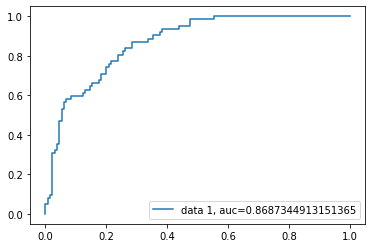

In [9]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1] 
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.